# Bike Sharing Project

In [1]:
# imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
import datetime as df
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score


In [2]:
# load data
f = pd.read_csv("Trips_2018.csv")
f.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [3]:
#remove the unwanted column ["Unnamed: 0"] ,[birth_year] and only keep station_id about station information
#first step of data cleaning

f = f.drop(columns=['Unnamed: 0','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','stoptime','bikeid']) 


The vector that we want to use for regression will correspond to each individual hour per individual day. So, we need to transform our dataframe such that we end up with each row corresponding to a day and each columns corresponding to one hour.

In [4]:
#the usual datetime format conversions
f['starttime']=pd.to_datetime(f['starttime'], format="%Y-%m-%d %H:%M:%S")

#f.set_index("starttime")


In [5]:
#The usertype and gender are **categorical** variable, which can have one of a finite set of values.
#to transform categorical variables into "dummy variables". 
f=pd.get_dummies(f, columns=['usertype','gender'])


In [6]:
#f=dt.groupby((['date', 'hour'])).agg({'bikeid':'count'})
#f.head()

df=f.groupby([pd.Grouper(key='starttime',freq='H')]).size().reset_index(name='Nb_pickups')


In [7]:
df['hour'] = pd.to_datetime(df['starttime']).dt.hour
df['day'] = pd.to_datetime(df['starttime']).dt.day

In [8]:
df

,starttime,Nb_pickups,hour,day
0,2018-01-01 00:00:00,119,0,1
1,2018-01-01 01:00:00,168,1,1
2,2018-01-01 02:00:00,98,2,1
3,2018-01-01 03:00:00,72,3,1
4,2018-01-01 04:00:00,34,4,1
...,...,...,...,...
8755,2018-12-31 19:00:00,168,19,31
8756,2018-12-31 20:00:00,189,20,31
8757,2018-12-31 21:00:00,91,21,31
8758,2018-12-31 22:00:00,98,22,31


In [11]:
x=np.c_[np.ones(len(df)),df['hour'], df['day']]
y= np.array(df['Nb_pickups'], ndmin=2).T

regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y);
print(regr.coef_)

[[822.32376196  99.96850387   1.98933837]]


In [70]:
y.shape

(8760, 1)

In [12]:
x

array([[ 1.,  0.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  1.],
       ...,
       [ 1., 21., 31.],
       [ 1., 22., 31.],
       [ 1., 23., 31.]])

In [10]:
split=1392
x_train = x[:split]
x_test =x[split:split+168]
y_train = y[:split]
y_test = y[split:split+168]

In [11]:
x_train

array([[ 1.,  0.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  1.],
       ...,
       [ 1., 21., 27.],
       [ 1., 22., 27.],
       [ 1., 23., 27.]])

In [12]:
x_train_standard=(x_train-x_train.mean())/x_train.std()
x_test_standard=(x_test-x_train.mean())/x_train.std()

In [13]:
regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x_train_standard, y_train);
print(regr.coef_)

[[-871.7588666   425.2046601   224.62651865]]


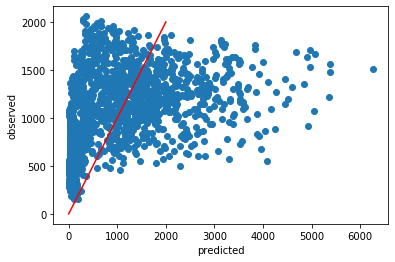

In [14]:
plt.scatter(y_train, regr.predict(x_train_standard))
plt.xlabel("predicted")
plt.ylabel("observed")
plt.plot([0, 2000], [0, 2000], color="red")
plt.show()

In [15]:
print("Mean Absolute error (MAE): %.2f"% np.mean(abs(regr.predict(x_train_standard) - y_train)))
# The mean squared error
print("Root Mean squared error: %.2f"
      % np.sqrt(np.mean((regr.predict(x_train_standard) - y_train) ** 2)))

Mean Absolute error (MAE): 752.51
Root Mean squared error: 978.33


In [21]:
df.corr()

,Nb_pickups,hour,day
Nb_pickups,1.000000,3.721882e-01,9.411572e-03
hour,0.372188,1.000000e+00,4.848940e-18
day,0.009412,4.848940e-18,1.000000e+00


In [16]:
def buildLaggedFeatures(s,columns, lag=168,dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

In [17]:
def my_plot(regr, X, y, Xlab="x", ylab="y", size=0.1, reg=True):

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean absolute error    
    print("Mean Absolute error (MAE): %.2f"% np.mean(abs(regr.predict(X) - y)))
    # The mean squared error
    print("Root Mean squared error: %.2f"
          % np.sqrt(np.mean((regr.predict(X) - y) ** 2)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, y))

    if X.shape[1]>1:
        X_uni=X[:,1]
    else:
        X_uni=X
            
    # Plot outputs
    plt.scatter(X_uni, y,  color='black', s=size)
    if reg:
        plt.plot(X_uni, regr.predict(x), color='blue',linewidth=3)
    plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
    plt.xlabel(Xlab)
    plt.ylabel(ylab)

    plt.show()

In [18]:
f_lagged=buildLaggedFeatures(df, ['Nb_pickups'], lag=168)
fllen=len(f_lagged)

In [19]:
f_lagged[:1248]

,starttime,Nb_pickups,hour,day,Nb_pickups_lag1,Nb_pickups_lag2,Nb_pickups_lag3,Nb_pickups_lag4,Nb_pickups_lag5,Nb_pickups_lag6,...,Nb_pickups_lag159,Nb_pickups_lag160,Nb_pickups_lag161,Nb_pickups_lag162,Nb_pickups_lag163,Nb_pickups_lag164,Nb_pickups_lag165,Nb_pickups_lag166,Nb_pickups_lag167,Nb_pickups_lag168
168,2018-01-08 00:00:00,43,0,8,94.0,140.0,169.0,209.0,293.0,398.0,...,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0,168.0,119.0
169,2018-01-08 01:00:00,24,1,8,43.0,94.0,140.0,169.0,209.0,293.0,...,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0,168.0
170,2018-01-08 02:00:00,17,2,8,24.0,43.0,94.0,140.0,169.0,209.0,...,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0
171,2018-01-08 03:00:00,13,3,8,17.0,24.0,43.0,94.0,140.0,169.0,...,385.0,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0
172,2018-01-08 04:00:00,35,4,8,13.0,17.0,24.0,43.0,94.0,140.0,...,444.0,385.0,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,2018-02-28 19:00:00,3275,19,28,4989.0,5739.0,3389.0,2609.0,2436.0,2339.0,...,58.0,57.0,76.0,159.0,305.0,639.0,961.0,1133.0,2210.0,3499.0
1412,2018-02-28 20:00:00,2198,20,28,3275.0,4989.0,5739.0,3389.0,2609.0,2436.0,...,320.0,58.0,57.0,76.0,159.0,305.0,639.0,961.0,1133.0,2210.0
1413,2018-02-28 21:00:00,1575,21,28,2198.0,3275.0,4989.0,5739.0,3389.0,2609.0,...,1150.0,320.0,58.0,57.0,76.0,159.0,305.0,639.0,961.0,1133.0
1414,2018-02-28 22:00:00,1134,22,28,1575.0,2198.0,3275.0,4989.0,5739.0,3389.0,...,1687.0,1150.0,320.0,58.0,57.0,76.0,159.0,305.0,639.0,961.0


In [20]:
prediction7Days=f_lagged[:1248]
prediction7Days=prediction7Days.drop(columns=['starttime','hour','day','Nb_pickups'])

In [21]:
yprediction7Days=f_lagged['Nb_pickups']

In [22]:
yprediction7Days=yprediction7Days[:1248]

In [135]:
#yprediction7Days=np.ones(len(f_lagged)).append(yprediction7Days)

In [29]:
prediction7Day = prediction7Days.iloc[-1].to_numpy()

In [30]:
prediction7Day

array([1134., 1575., 2198., 3275., 4989., 5739., 3389., 2609., 2436.,
       2339., 2175., 1709., 1865., 3568., 5488., 3168., 1420.,  379.,
         64.,   35.,   71.,  134.,  277.,  523.,  962., 1427., 1956.,
       3148., 4970., 5071., 3239., 2634., 2354., 2312., 2167., 1794.,
       1814., 3504., 5357., 3092., 1401.,  370.,   56.,   31.,   34.,
         89.,  211.,  464.,  908., 1313., 1976., 2967., 4672., 4896.,
       2804., 2123., 1966., 1780., 1707., 1379., 1474., 2864., 4504.,
       2730., 1308.,  347.,   46.,   27.,   39.,   90.,  186.,  329.,
        556.,  757.,  937., 1272., 1518., 1677., 1751., 1548., 1275.,
       1039.,  880.,  569.,  454.,  363.,  220.,   85.,   22.,   13.,
         22.,   84.,  165.,  246.,  368.,  433.,  430.,  478.,  790.,
       1051., 1292., 1221., 1198.,  898., 2481., 2674., 2779., 2776.,
       2324., 1808., 1075.,  519.,  237.,   83.,   70.,  118.,  152.,
        242.,  421.,  529.,  650.,  867., 1188., 1677., 1897., 1969.,
       1514., 1303.,

In [23]:
x=np.c_[prediction7Days]

In [24]:
y=np.array(yprediction7Days, ndmin=2).T

In [25]:
x_standard=(x-x.mean())/x.std()

In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [33]:
x_scaled

array([[-1.00555968, -0.96260966, -0.93491529, ..., -0.92712876,
        -0.85986127, -0.90670783],
       [-1.05197918, -1.00446273, -0.96129292, ..., -0.95211831,
        -0.92714124, -0.85961737],
       [-1.06927272, -1.05086505, -1.00313329, ..., -0.98864151,
        -0.95213095, -0.92688946],
       ...,
       [ 0.9094723 ,  1.88976801,  3.44922813, ..., -0.40715382,
        -0.09767533,  0.06777648],
       [ 0.34242624,  0.90986027,  1.89021945, ..., -0.72817347,
        -0.40716319, -0.09752066],
       [-0.05896592,  0.34302414,  0.91060898, ..., -0.86849942,
        -0.72818476, -0.40697229]])

In [26]:
x_standard

array([[-0.96459466, -0.92083373, -0.89324532, ..., -0.96078936,
        -0.89419664, -0.94081155],
       [-1.01311222, -0.96459466, -0.92083373, ..., -0.9855238 ,
        -0.96078936, -0.89419664],
       [-1.03118739, -1.01311222, -0.96459466, ..., -1.02167414,
        -0.9855238 , -0.96078936],
       ...,
       [ 1.03699236,  2.06156899,  3.69213941, ..., -0.44612274,
        -0.13979621,  0.02383163],
       [ 0.44431712,  1.03699236,  2.06156899, ..., -0.76386517,
        -0.44612274, -0.13979621],
       [ 0.02478295,  0.44431712,  1.03699236, ..., -0.90275856,
        -0.76386517, -0.44612274]])

In [27]:
print("x", x.shape)
print("y", y.shape)

x (1248, 168)
y (1248, 1)


In [36]:
regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y);

Coefficients: 
 [[ 1.28321618e+00 -6.83263824e-01  2.91409545e-01 -7.07696611e-02
  -1.25494247e-02  2.21764674e-02 -7.27135083e-02 -4.25521118e-02
   3.79467719e-01 -2.84403641e-01  5.46873775e-02  5.03790679e-02
  -1.21784454e-01  9.65862165e-02 -7.65065170e-02  6.71380371e-02
   1.09144175e-01 -2.11675630e-01  8.91946871e-02  1.02159576e-02
  -9.46810550e-02  1.56482613e-01 -1.56103847e-01  4.99635657e-01
  -5.30581000e-01  1.87426269e-01 -9.82641716e-05 -5.39235809e-02
   5.39350650e-02  4.14468441e-03  9.49015838e-03 -4.18919853e-02
  -2.82701788e-02 -1.65343768e-02  9.72899634e-02 -1.19581519e-01
   1.08933112e-01 -3.22793748e-02 -7.57347780e-02  9.48745934e-02
  -9.04829566e-02  6.78900452e-02  7.19941660e-03 -3.07539652e-02
   2.63355344e-02  9.76418123e-03 -7.01185181e-02  5.75864353e-02
  -2.50883451e-02  2.87759016e-02 -1.55166339e-02  2.20913306e-02
  -4.69832578e-02  6.06324086e-02 -6.76460168e-02  1.12623945e-01
  -1.61460082e-01  8.04052005e-02 -1.71943479e-02 -1.8793864

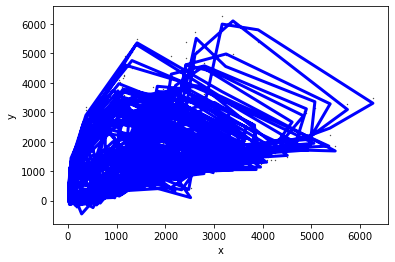

In [37]:
my_plot(regr, x, y)

In [38]:
regr.score(x,y)

0.9501141903923276

Question2

In [6]:
df=f.groupby([pd.Grouper(key='starttime',freq='D')]).size().reset_index(name='Nb_pickups')

In [45]:
df['day'] = pd.to_datetime(df['starttime']).dt.day

In [47]:
df.head()

,starttime,Nb_pickups,hour,day
0,2018-01-01 00:00:00,119,0,1
1,2018-01-01 01:00:00,168,1,1
2,2018-01-01 02:00:00,98,2,1
3,2018-01-01 03:00:00,72,3,1
4,2018-01-01 04:00:00,34,4,1


In [80]:
x=np.c_[np.ones(len(df)), df['day']]
y= np.array(df['Nb_pickups'], ndmin=2).T

regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y);
print(regr.coef_)

[[1971.96155648    1.98933837]]


In [41]:
y.shape

(8760, 1)

In [49]:
X

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [31],
       [31],
       [31]], dtype=int64)

In [81]:
split=-61
x_train = x[:split]
x_test =x[split:]
y_train = y[:split]
y_test = y[split:]

In [51]:
x_train

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       ...,
       [ 1., 29.],
       [ 1., 29.],
       [ 1., 29.]])

In [52]:
regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x_train, y_train);
print(regr.coef_)

[[1957.95730733    3.32790944]]


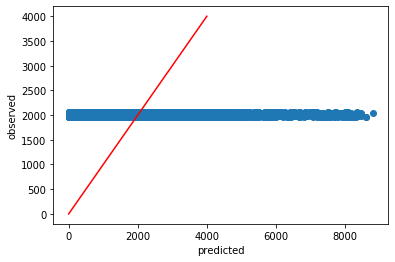

In [53]:
plt.scatter(y_train, regr.predict(x_train))
plt.xlabel("predicted")
plt.ylabel("observed")
plt.plot([0, 4000], [0, 4000], color="red")
plt.show()

In [54]:
print("Mean Absolute error (MAE): %.2f"% np.mean(abs(regr.predict(x_train) - y_train)))
# The mean squared error
print("Root Mean squared error: %.2f"
      % np.sqrt(np.mean((regr.predict(x_train) - y_train) ** 2)))

Mean Absolute error (MAE): 1512.62
Root Mean squared error: 1862.46


In [55]:
df.corr()

,Nb_pickups,hour,day
Nb_pickups,1.000000,3.721882e-01,9.411572e-03
hour,0.372188,1.000000e+00,4.848940e-18
day,0.009412,4.848940e-18,1.000000e+00


In [56]:
f_lagged=buildLaggedFeatures(df, ['Nb_pickups'], lag=61)
fllen=len(f_lagged)

In [57]:
f_lagged[:-61]

,starttime,Nb_pickups,hour,day,Nb_pickups_lag1,Nb_pickups_lag2,Nb_pickups_lag3,Nb_pickups_lag4,Nb_pickups_lag5,Nb_pickups_lag6,...,Nb_pickups_lag52,Nb_pickups_lag53,Nb_pickups_lag54,Nb_pickups_lag55,Nb_pickups_lag56,Nb_pickups_lag57,Nb_pickups_lag58,Nb_pickups_lag59,Nb_pickups_lag60,Nb_pickups_lag61
61,2018-01-03 13:00:00,990,13,3,922.0,853.0,940.0,1883.0,2651.0,1462.0,...,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0,168.0,119.0
62,2018-01-03 14:00:00,1150,14,3,990.0,922.0,853.0,940.0,1883.0,2651.0,...,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0,168.0
63,2018-01-03 15:00:00,1212,15,3,1150.0,990.0,922.0,853.0,940.0,1883.0,...,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0
64,2018-01-03 16:00:00,1643,16,3,1212.0,1150.0,990.0,922.0,853.0,940.0,...,385.0,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0
65,2018-01-03 17:00:00,2681,17,3,1643.0,1212.0,1150.0,990.0,922.0,853.0,...,444.0,385.0,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,2018-12-29 06:00:00,172,6,29,71.0,79.0,129.0,181.0,319.0,428.0,...,74.0,115.0,256.0,410.0,574.0,747.0,900.0,1358.0,1863.0,2389.0
8695,2018-12-29 07:00:00,383,7,29,172.0,71.0,79.0,129.0,181.0,319.0,...,41.0,74.0,115.0,256.0,410.0,574.0,747.0,900.0,1358.0,1863.0
8696,2018-12-29 08:00:00,820,8,29,383.0,172.0,71.0,79.0,129.0,181.0,...,85.0,41.0,74.0,115.0,256.0,410.0,574.0,747.0,900.0,1358.0
8697,2018-12-29 09:00:00,1407,9,29,820.0,383.0,172.0,71.0,79.0,129.0,...,230.0,85.0,41.0,74.0,115.0,256.0,410.0,574.0,747.0,900.0


In [58]:
prediction2Months=f_lagged[:-61]
prediction2Months=prediction2Months.drop(columns=['starttime','Nb_pickups',
                                             'day','hour'])

In [59]:
prediction2Months

,Nb_pickups_lag1,Nb_pickups_lag2,Nb_pickups_lag3,Nb_pickups_lag4,Nb_pickups_lag5,Nb_pickups_lag6,Nb_pickups_lag7,Nb_pickups_lag8,Nb_pickups_lag9,Nb_pickups_lag10,...,Nb_pickups_lag52,Nb_pickups_lag53,Nb_pickups_lag54,Nb_pickups_lag55,Nb_pickups_lag56,Nb_pickups_lag57,Nb_pickups_lag58,Nb_pickups_lag59,Nb_pickups_lag60,Nb_pickups_lag61
61,922.0,853.0,940.0,1883.0,2651.0,1462.0,745.0,222.0,43.0,19.0,...,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0,168.0,119.0
62,990.0,922.0,853.0,940.0,1883.0,2651.0,1462.0,745.0,222.0,43.0,...,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0,168.0
63,1150.0,990.0,922.0,853.0,940.0,1883.0,2651.0,1462.0,745.0,222.0,...,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0
64,1212.0,1150.0,990.0,922.0,853.0,940.0,1883.0,2651.0,1462.0,745.0,...,385.0,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0
65,1643.0,1212.0,1150.0,990.0,922.0,853.0,940.0,1883.0,2651.0,1462.0,...,444.0,385.0,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,71.0,79.0,129.0,181.0,319.0,428.0,553.0,708.0,789.0,906.0,...,74.0,115.0,256.0,410.0,574.0,747.0,900.0,1358.0,1863.0,2389.0
8695,172.0,71.0,79.0,129.0,181.0,319.0,428.0,553.0,708.0,789.0,...,41.0,74.0,115.0,256.0,410.0,574.0,747.0,900.0,1358.0,1863.0
8696,383.0,172.0,71.0,79.0,129.0,181.0,319.0,428.0,553.0,708.0,...,85.0,41.0,74.0,115.0,256.0,410.0,574.0,747.0,900.0,1358.0
8697,820.0,383.0,172.0,71.0,79.0,129.0,181.0,319.0,428.0,553.0,...,230.0,85.0,41.0,74.0,115.0,256.0,410.0,574.0,747.0,900.0


In [60]:
yprediction2Months=f_lagged['Nb_pickups']

In [61]:
yprediction2Months=yprediction2Months[:-61]

In [62]:
yprediction2Months

61       990
62      1150
63      1212
64      1643
65      2681
        ... 
8694     172
8695     383
8696     820
8697    1407
8698    1989
Name: Nb_pickups, Length: 8638, dtype: int64

In [66]:
x=np.c_[prediction2Months]

In [67]:
y=np.array(yprediction2Months, ndmin=2).T

In [64]:
x_standard=(x-x.mean())/x.std()

In [68]:
regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y);

Coefficients: 
 [[ 1.29084651e+00 -6.92080808e-01  2.51013651e-01 -7.98895131e-02
   9.67348199e-03  6.45093788e-03 -5.27938257e-02 -5.03922169e-02
   3.28560400e-01 -2.02768780e-01 -8.40906124e-03  7.85591149e-02
  -9.88799248e-02  1.42532449e-01 -5.18031697e-02 -7.65335528e-02
   1.26950457e-01 -1.13997875e-01  1.24566159e-02  3.94264925e-02
  -5.95804871e-02  5.42929778e-02  3.90934440e-02  5.05029208e-01
  -6.47922393e-01  2.60166581e-01 -5.13656115e-02  3.38605429e-02
  -4.55045208e-02  3.82870354e-02  4.07897338e-02 -6.11423388e-02
  -7.82350378e-02  1.04289144e-02  5.74065195e-02 -4.80764290e-02
   1.88131722e-02 -5.21031941e-02  3.87469801e-02 -7.43533952e-03
   1.48586917e-02 -1.13152475e-02  4.99878558e-02 -1.80005669e-02
   2.02767460e-02  3.21370512e-03 -3.01433432e-02  9.74161455e-02
  -8.07522707e-02  7.80887377e-02 -3.91557853e-02  2.20356811e-02
  -2.92373782e-03  1.08175485e-03 -1.27118831e-02  4.46325896e-02
  -5.08840787e-02  1.14490872e-02 -4.28514538e-03 -2.6509161

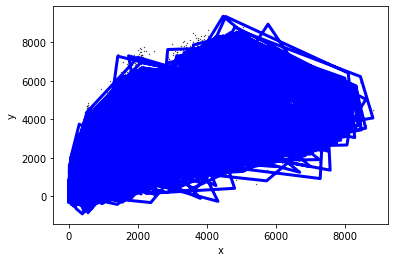

In [69]:
my_plot(regr, x, y)

In [59]:
regr.score(x,y)

0.9296019810391883